**1.	What data did you use? If it is a book from Gutenberg, which one?**

In [2]:
!pip install gutenbergpy # https://github.com/raduangelescu/gutenbergpy to get access to full texts of books

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for httpsproxy-urllib2: filename=httpsproxy_urllib2-1.0-py3-none-any.whl size=29269 sha256=12285ada1f8b4668234927f49d91e93f3935b09332b77ca1403033a3611bc24e
  Stored in directory: /root/.cache/pip/wheels/91/04/37/b7080e0cfe33a8bc79ff0082159cea767f9145a5a713b501a3
Successfully built httpsproxy-urllib2


In [3]:
target = 8 # this one is by Abraham Lincol: Lincoln's Second Inaugural Address
import gutenbergpy.textget
raw = gutenbergpy.textget.get_text_by_id(target) # access the content
count = 100 # how many characters we wish to see
print(raw[:count])

b"The Project Gutenberg EBook of Lincoln's Second Inaugural Address, March\r\n4, 1865, by Abraham Lincol"


**2.	Can you estimate how many sentences it contains? What can you do to compute this (conceptually, in Python and/or in R)?**

In [4]:
from nltk.tokenize import sent_tokenize
text = gutenbergpy.textget.strip_headers(raw)
text

b'\n\n\n\n\n\n\n\n\n\n\n\nAll of the original Project Gutenberg Etexts from the\n1970\'s were produced in ALL CAPS, no lower case.  The\ncomputers we used then didn\'t have lower case at all.\n\n***\n\nThese original Project Gutenberg Etexts will be compiled into a file\ncontaining them all, in order to improve the content ratios of Etext\nto header material.\n\n***\n\nLincoln\'s Second Inaugural Address\nMarch 4, 1865\n\n\n\nFellow countrymen:  At this second appearing to take the oath\nof the presidential office, there is less occasion for an extended\naddress than there was at the first.  Then a statement, somewhat\nin detail, of a course to be pursued, seemed fitting and proper.\nNow, at the expiration of four years, during which public declarations\nhave been constantly called forth on every point and phase of the great\ncontest which still absorbs the attention and engrosses the energies\nof the nation, little that is new could be presented.  The progress\nof our arms, upon which

In [5]:
s = text.decode("utf-8") # get a string from the byte sequence

marker = 'March 4, 1865\n\n\n\n'
startPosition = s.index(marker) + len(marker)
content = s[startPosition:]
content

'Fellow countrymen:  At this second appearing to take the oath\nof the presidential office, there is less occasion for an extended\naddress than there was at the first.  Then a statement, somewhat\nin detail, of a course to be pursued, seemed fitting and proper.\nNow, at the expiration of four years, during which public declarations\nhave been constantly called forth on every point and phase of the great\ncontest which still absorbs the attention and engrosses the energies\nof the nation, little that is new could be presented.  The progress\nof our arms, upon which all else chiefly depends, is as well known\nto the public as to myself; and it is, I trust, reasonably satisfactory\nand encouraging to all.  With high hope for the future, no prediction\nin regard to it is ventured.\n\nOn the occasion corresponding to this four years ago, all thoughts\nwere anxiously directed to an impending civil war.  All dreaded it--\nall sought to avert it.  While the inaugural address was being deliver

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
sent = sent_tokenize(content)
sent[:10]

['Fellow countrymen:  At this second appearing to take the oath\nof the presidential office, there is less occasion for an extended\naddress than there was at the first.',
 'Then a statement, somewhat\nin detail, of a course to be pursued, seemed fitting and proper.',
 'Now, at the expiration of four years, during which public declarations\nhave been constantly called forth on every point and phase of the great\ncontest which still absorbs the attention and engrosses the energies\nof the nation, little that is new could be presented.',
 'The progress\nof our arms, upon which all else chiefly depends, is as well known\nto the public as to myself; and it is, I trust, reasonably satisfactory\nand encouraging to all.',
 'With high hope for the future, no prediction\nin regard to it is ventured.',
 'On the occasion corresponding to this four years ago, all thoughts\nwere anxiously directed to an impending civil war.',
 'All dreaded it--\nall sought to avert it.',
 'While the inaugural addre

In [8]:
len(sent)

27

**3. How about paragraphs? Can you estimate how many there are? What can you do to compute this (conceptually, in Python and/or in R)?**

In [9]:
paragraphs = list(filter(lambda x : x != '', content.split('\n\n')))
paragraphs[:2]

['Fellow countrymen:  At this second appearing to take the oath\nof the presidential office, there is less occasion for an extended\naddress than there was at the first.  Then a statement, somewhat\nin detail, of a course to be pursued, seemed fitting and proper.\nNow, at the expiration of four years, during which public declarations\nhave been constantly called forth on every point and phase of the great\ncontest which still absorbs the attention and engrosses the energies\nof the nation, little that is new could be presented.  The progress\nof our arms, upon which all else chiefly depends, is as well known\nto the public as to myself; and it is, I trust, reasonably satisfactory\nand encouraging to all.  With high hope for the future, no prediction\nin regard to it is ventured.',
 'On the occasion corresponding to this four years ago, all thoughts\nwere anxiously directed to an impending civil war.  All dreaded it--\nall sought to avert it.  While the inaugural address was being deliv

In [10]:
len(paragraphs)

6

**4. How many names (of places and people) are mentioned in the text? What did you do to compute this (conceptually, in Python and/or in R)?**

In [11]:
import nltk
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [12]:
wrds = nltk.wordpunct_tokenize(content)
wrds[:5]

['Fellow', 'countrymen', ':', 'At', 'this']

https://www.guru99.com/pos-tagging-chunking-nltk.html

In [21]:
tag = nltk.pos_tag(wrds)
tag[:5]

[('Fellow', 'JJ'),
 ('countrymen', 'NNS'),
 (':', ':'),
 ('At', 'IN'),
 ('this', 'DT')]

In [22]:
name = [item for item in tag if item[1] == 'NNP']
name

[('Union', 'NNP'),
 ('Union', 'NNP'),
 ('Union', 'NNP'),
 ('Southern', 'NNP'),
 ('Union', 'NNP'),
 ('Bible', 'NNP'),
 ('God', 'NNP'),
 ('God', 'NNP'),
 ('Almighty', 'NNP'),
 ('Woe', 'NNP'),
 ('God', 'NNP'),
 ('North', 'NNP'),
 ('South', 'NNP'),
 ('God', 'NNP'),
 ('God', 'NNP'),
 ('Lord', 'NNP'),
 ('God', 'NNP')]

In [23]:
len(name)

17

In [24]:
skip_name = ['Woe']

In [25]:
name = [item for item in tag if item[1] == 'NNP' and item[0] not in skip_name]
name

[('Union', 'NNP'),
 ('Union', 'NNP'),
 ('Union', 'NNP'),
 ('Southern', 'NNP'),
 ('Union', 'NNP'),
 ('Bible', 'NNP'),
 ('God', 'NNP'),
 ('God', 'NNP'),
 ('Almighty', 'NNP'),
 ('God', 'NNP'),
 ('North', 'NNP'),
 ('South', 'NNP'),
 ('God', 'NNP'),
 ('God', 'NNP'),
 ('Lord', 'NNP'),
 ('God', 'NNP')]

In [26]:
len(name)

16

In [27]:
unique = list(set(name))
unique

[('Southern', 'NNP'),
 ('South', 'NNP'),
 ('Union', 'NNP'),
 ('Lord', 'NNP'),
 ('North', 'NNP'),
 ('God', 'NNP'),
 ('Almighty', 'NNP'),
 ('Bible', 'NNP')]

In [28]:
len(unique)

8

**5. What are the ten most frequent words in the text that you consider to clearly be stop words?**

In [29]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
skip = stopwords.words('english')
print('The' in skip, 'the' in skip)

False True


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
from string import punctuation
import re # a regular-expression library

nopunct = content.translate(str.maketrans(punctuation, ' ' * len(punctuation))) # substitute with space
clean = re.compile(r'\s+') # also combine any kind of repeated whitespace into a single space
ok = clean.sub(' ', nopunct) # in case we made repeated spaces
words = ok.split()
freq = { w : words.count(w) for w in words if w.lower() in skip }
f = nltk.FreqDist(freq)
print(f.most_common(10))

[('the', 54), ('to', 26), ('and', 23), ('of', 22), ('that', 12), ('it', 12), ('for', 9), ('in', 9), ('which', 9), ('be', 8)]


**6. What are the ten most frequent words in the text that you consider to not be stop words?**

In [31]:
freq = { w : words.count(w) for w in words if w.lower() not in skip }
f = nltk.FreqDist(freq)
print(f.most_common(20))

[('war', 12), ('God', 6), ('shall', 5), ('years', 4), ('Union', 4), ('let', 4), ('nation', 3), ('would', 3), ('interest', 3), ('right', 3), ('may', 3), ('us', 3), ('offenses', 3), ('must', 3), ('less', 2), ('occasion', 2), ('address', 2), ('four', 2), ('public', 2), ('every', 2)]


let, us, may, shall, would, etc. are stopwords. Add in the list.

In [32]:
skip += ['let','would','us','may','shall','must','less','neither','without']
freq = { w : words.count(w) for w in words if w.lower() not in skip }
f = nltk.FreqDist(freq)
print(f.most_common(10))

[('war', 12), ('God', 6), ('years', 4), ('Union', 4), ('nation', 3), ('interest', 3), ('right', 3), ('offenses', 3), ('occasion', 2), ('address', 2)]


**7. How would you go about automatically identifying potential stop words for documents
written in a language you do not speak?**

In [33]:
# Print the list of available languages
print(stopwords.fileids())

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [35]:
len(stopwords.fileids())

29

Un mot vide est un mot commun, non significatif dans le texte qui est inutile à indexer et de référencement. En linguistique, un mot vide est attaché à son sens. Donc des mots-outils d’une langue, (déterminants, pronoms, prépositions, conjonctions, adverbes). La linguistique souligne l’utilité d’un mot par rapport à sa fréquence et sa taille. À faire attention au mot homonymes (même mot mais signification différente selon le contexte).

La signification d’un mot peut donc s’évaluer à partir de sa distribution dans une collection de texte. Un mot qui apparaît avec une fréquence semblable dans chacun des textes de la collection sera considéré comme un mot vide. Se créer par conséquent une collection de texte dans ce langage sur un thème similaire afin de comparer la distribution de mot pourrait être considéré. (Chapitre 3 du livre R - La loi de Zipf dit que la fréquence d’apparition d’un mot est inversement proportionnelle à son rang).

**8. Looking at a histogram of the word frequencies (like the horizontal bar chart in the R example code), what can be said about the shape of the distribution?**

In [37]:
import collections
import operator
word_cnt = collections.Counter(freq)
count_words, count_values = zip(*word_cnt.items())
values_sorted, words_sorted = zip(*sorted(zip(count_values, count_words), key=operator.itemgetter(0), reverse=True))

In [38]:
words_sorted_top = words_sorted[0:10]
values_sorted_top = values_sorted[0:10]

In [39]:
values_sorted_top

(12, 6, 4, 4, 3, 3, 3, 3, 2, 2)

In [40]:
words_sorted_top

('war',
 'God',
 'years',
 'Union',
 'nation',
 'interest',
 'right',
 'offenses',
 'occasion',
 'address')

In [41]:
import pandas as pd
df = pd.DataFrame({'count': values_sorted_top, 'word': words_sorted_top})
df

,count,word
0,12,war
1,6,God
2,4,years
3,4,Union
4,3,nation
5,3,interest
6,3,right
7,3,offenses
8,2,occasion
9,2,address


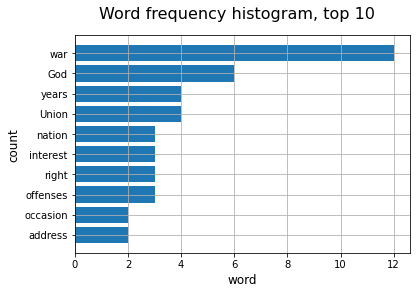

In [42]:
import matplotlib.pyplot as plt
#% matplotlib inline

# creating the data values for the vertical y and horisontal x axis
y = df.iloc[:,0].sort_index(ascending=False)
x = df.iloc[:,1].sort_index(ascending=False)

fig = plt.figure()
fig.suptitle('Word frequency histogram, top {0}'.format(10), fontsize=16)
plt.xlabel('word', fontsize=12)
plt.ylabel('count', fontsize=12)

# using the pyplot.barh funtion for the horizontal bar
plt.barh(x,y)
plt.grid()

# to show our graph
plt.show()

Skewed, exponential distribution

**9. Please show an example of a word cloud you created from your text along with a code
snippet of how you did it.**

In [43]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Plotting just the last chapter


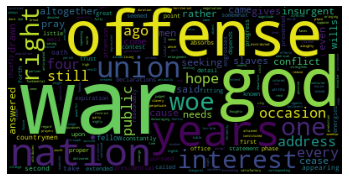

In [44]:
from wordcloud import WordCloud, ImageColorGenerator

print(f'Plotting just the last chapter')
para = paragraphs[-1]
nopunct = content.translate(str.maketrans(punctuation, ' ' * len(punctuation))) # substitute with space
clean = re.compile(r'\s+') # also combine any kind of repeated whitespace into a single space
ok = clean.sub(' ', nopunct) # in case we made repeated spaces
words = ok.split()
draw = ' '.join([ w.lower() for w in words if w.lower() not in skip and len(w) > 2 ])
cloud = WordCloud().generate(draw)
plt.imshow(cloud)
plt.axis('off')
plt.show()

Plotting in 3 by 3 grid


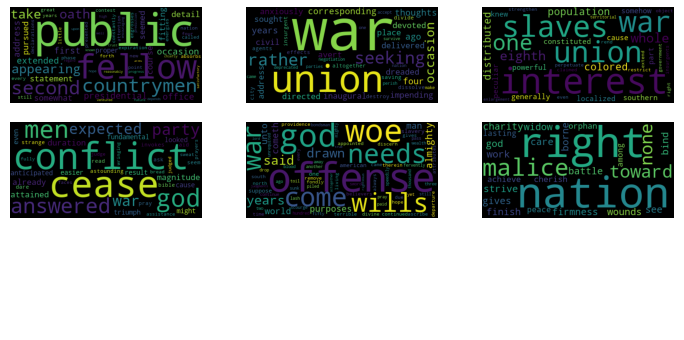

In [45]:
from math import sqrt, ceil
dim = int(ceil(sqrt(len(paragraphs))))
print(f'Plotting in {dim} by {dim} grid')
plt.rcParams['figure.figsize'] = [ 4 * dim, 2 * dim ]
f, a = plt.subplots(dim, dim)
r, c = 0, 0
for para in paragraphs:
  nopunct = para.translate(str.maketrans(punctuation, ' ' * len(punctuation))) # substitute with space
  clean = re.compile(r'\s+') # also combine any kind of repeated whitespace into a single space
  ok = clean.sub(' ', nopunct) # in case we made repeated spaces
  words = ok.split()
  draw = ' '.join([ w.lower() for w in words if w.lower() not in skip and len(w) > 2 ])
  cloud = WordCloud().generate(draw)
  a[r, c].imshow(cloud)
  c += 1 # fill by row
  if c == dim:
    c = 0
    r += 1
for r in range(dim):
  for c in range(dim):
      a[r, c].axis('off') # also make the unoccupied slots blank
plt.show()